In [5]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Importing public school data, spending information, and test score performance for all 50 schools, over 2009-2017. We are attempting to find which area of spending most directly impacts test score performance.

In [6]:
df = pd.read_excel('/Users/ved/Downloads/CompiledData4240.xlsx', sheet_name = 'Trimmed Complete Data Sheet')
columns= ["Total Revenue","Total Expenditure", 
          "Federal Revenue", 
          "State Revenue", 
          "Local Revenue", 
          'Past 8th Grade Math Score Avg',
          'Past 4th Grade Math Score Avg',
          'Past 8th Grade Reading Score Avg',
          'Past 4th Grade Reading Score Avg',
          'Past 8th Grade Score Avg',
          'Past 4th Grade Score Avg',
          '8th Grade Math Score Avg',
          '4th Grade Math Score Avg',
          '8th Grade Reading Score Avg',
          '4th Grade Reading Score Avg',
          '8th Grade Score Avg',
          '4th Grade Score Avg',
         'Past Overall Score Avg',
         ]
df = df.drop(columns, axis=1)
df_copy = df
df.head()

,Geographic Area,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,Instructional Staff,General Admin,School Admin,PP&E,Transportation,Other,Construction,Instructional Equipment,Overall Score Avg
0,Alabama,3836398,2331552,5142,3127,373885,311990,172998,416154,610804,314694,131027,857281,9873,241.913843
1,Alaska,1129756,832783,8675,6394,164629,114604,31139,122462,264068,60158,75723,200985,8304,247.709185
2,Arizona,4296503,2983729,4376,3039,542272,244871,101852,377272,935993,353305,428164,1005890,153806,243.726983
3,Arkansas,2417974,1492691,5089,3146,206128,330309,93645,218073,394953,151034,98549,222375,21050,246.935063
4,California,35617964,21693675,5776,3518,2992661,3753972,563797,3966831,5930549,1532426,2953439,7902686,26914,241.129325


In [7]:
df.shape

(250, 15)

In [12]:
display(df)

,Geographic Area,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,Instructional Staff,General Admin,School Admin,PP&E,Transportation,Other,Construction,Instructional Equipment,Overall Score Avg
0,Alabama,3836398,2331552,5142,3127,373885,311990,172998,416154,610804,314694,131027,857281,9873,241.913843
1,Alaska,1129756,832783,8675,6394,164629,114604,31139,122462,264068,60158,75723,200985,8304,247.709185
2,Arizona,4296503,2983729,4376,3039,542272,244871,101852,377272,935993,353305,428164,1005890,153806,243.726983
3,Arkansas,2417974,1492691,5089,3146,206128,330309,93645,218073,394953,151034,98549,222375,21050,246.935063
4,California,35617964,21693675,5776,3518,2992661,3753972,563797,3966831,5930549,1532426,2953439,7902686,26914,241.129325
5,Colorado,4108304,2708535,5047,3334,330672,392190,114320,482658,699187,212841,476667,739001,51062,255.428777
6,Connecticut,5054397,2805173,8872,5129,507084,258006,183626,464977,800307,412162,179011,673622,32698,258.527127
7,Delaware,877678,496383,7475,4250,72398,16373,15975,85469,146468,89849,69851,248466,1991,253.458024
8,Florida,13884278,8067350,5293,3076,1070743,1489251,207579,1311982,2461851,932856,593088,3481102,19090,252.828905
9,Georgia,10063924,5135180,6052,3113,768126,811828,235318,939217,1188791,663852,528048,2334126,43182,247.920851


In [9]:
[col for col in df.columns if "Geographic" not in col]

['Instructional Spending',
 'Support System Spending',
 'Per Pupil Instructional',
 'Per Pupil Support Systems',
 'Pupils',
 'Instructional Staff',
 'General Admin',
 'School Admin',
 'PP&E',
 'Transportation',
 'Other',
 'Construction',
 'Instructional Equipment',
 'Overall Score Avg']

Columns are orders of magnitude apart so we will normalize in order for the coefficients to be meaningful

In [7]:
df[[col for col in df.columns if "Geographic" not in col]] = df[["Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Per Pupil Support Systems", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg",]]/df[["Instructional Spending", "Support System Spending", "Per Pupil Instructional","Per Pupil Support Systems", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment", "Overall Score Avg"]].max()
# normalization
df.head()

,Geographic Area,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,Instructional Staff,General Admin,School Admin,PP&E,Transportation,Other,Construction,Instructional Equipment,Overall Score Avg
0,Alabama,0.084986,0.084561,0.319121,0.382554,0.083002,0.068822,0.147597,0.083744,0.086251,0.090956,0.032564,0.101466,0.046205,0.909407
1,Alaska,0.025027,0.030203,0.538385,0.782236,0.036547,0.025280,0.026567,0.024643,0.037289,0.017387,0.018819,0.023788,0.038862,0.931193
2,Arizona,0.095179,0.108214,0.271582,0.371789,0.120384,0.054016,0.086897,0.075920,0.132170,0.102116,0.106410,0.119055,0.719803,0.916223
3,Arkansas,0.053565,0.054137,0.315832,0.384879,0.045760,0.072863,0.079895,0.043884,0.055771,0.043653,0.024492,0.026320,0.098513,0.928283
4,California,0.789032,0.786789,0.358468,0.430389,0.664367,0.828085,0.481016,0.798258,0.837444,0.442917,0.734008,0.935348,0.125956,0.906458


In [8]:
correlations = df.corr()
correlations = correlations['Overall Score Avg']
print(correlations)
# Performing basic correlation to get a baseline idea

Instructional Spending      -0.019983
Support System Spending     -0.044114
Per Pupil Instructional      0.387350
Per Pupil Support Systems    0.290463
Pupils                       0.008581
Instructional Staff         -0.078774
General Admin                0.052932
School Admin                -0.089463
PP&E                        -0.049721
Transportation               0.044602
Other                       -0.106989
Construction                -0.128239
Instructional Equipment      0.133154
Overall Score Avg            1.000000
Name: Overall Score Avg, dtype: float64


Evidently Overall Score Avg is most closely correlated to Past Overall Score Avg. This was expected since Past Overall Score Avg is just the Overall Score Avg lagging by one time period (2 years)

In [9]:
X = df[[col for col in df.columns if "Geographic" not in col and "Overall" not in col]].values
y = df['Overall Score Avg'].values

Text(0.5, 0, 'Overall Score Average across all states 2007-2017')

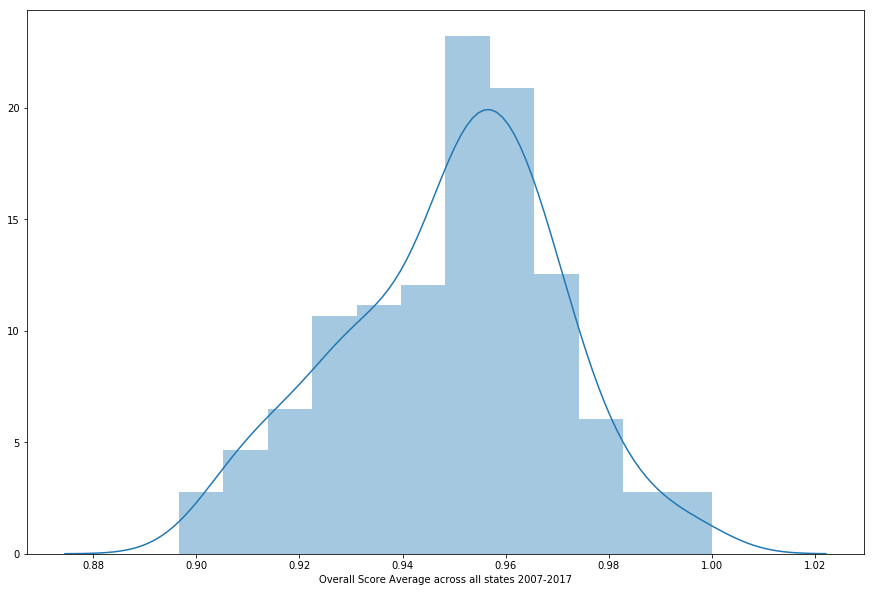

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_copy['Overall Score Avg'])
plt.xlabel("Overall Score Average across all states 2007-2017")

Score distribution slightly skewed

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
coeff_df = pd.DataFrame(regressor.coef_, [["Instructional Spending", "Support System Spending", "Per Pupil Instructional", "Per Pupil Support Systems", "Pupils", "Instructional Staff", "General Admin", "School Admin", "PP&E", "Transportation", "Other", "Construction", "Instructional Equipment"]], columns=['Coefficient'])  
coeff_df

,Coefficient
Instructional Spending,-0.411845
Support System Spending,0.079076
Per Pupil Instructional,0.364695
Per Pupil Support Systems,-0.226041
Pupils,0.108939
Instructional Staff,0.175182
General Admin,-0.023059
School Admin,-0.187772
PP&E,0.194763
Transportation,0.071681


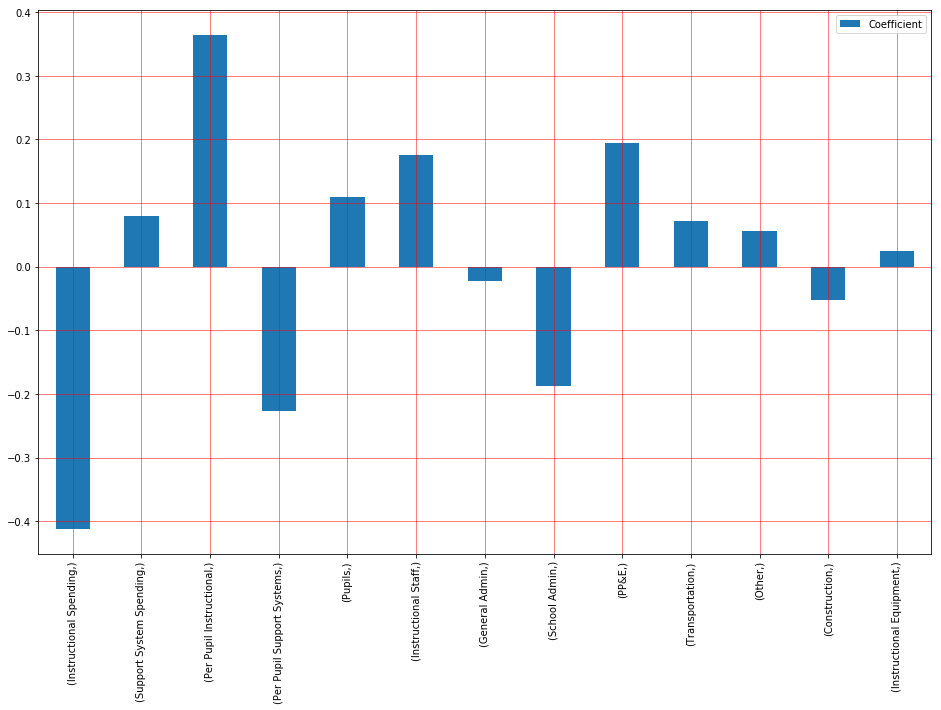

In [14]:
coeff_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Initial Multiple Linear Regression returns no strong correlations. Further analysis is required.

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head(15)

,Actual,Predicted
0,0.954707,0.944157
1,0.983096,0.971341
2,0.950328,0.948317
3,0.944316,0.969878
4,0.919635,0.940876
5,0.951820,0.934517
6,0.963561,0.950517
7,0.969339,0.959211
8,0.953244,0.942878
9,0.957848,0.934336


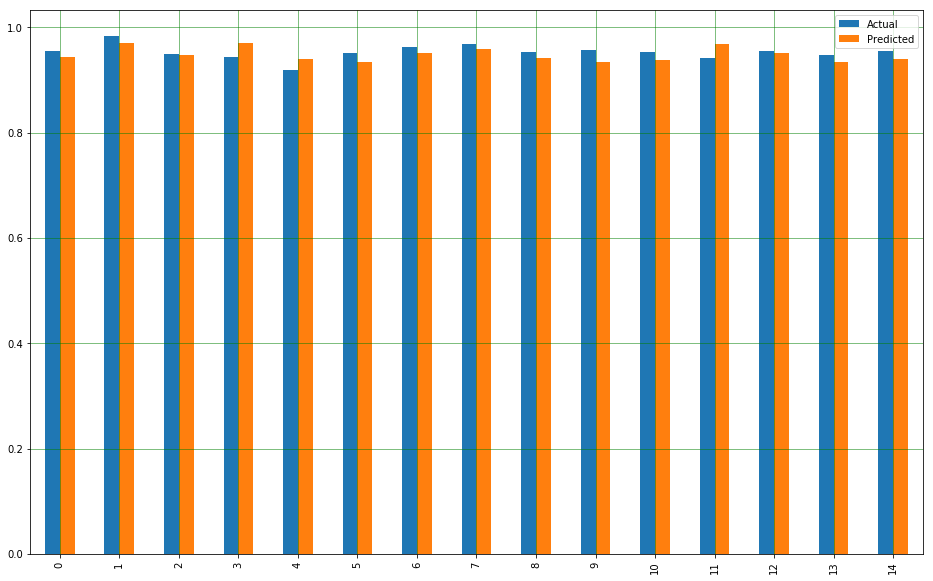

In [25]:
df2 = df1.head(15)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# RMSE more accurate as closer to 0

Mean Absolute Error: 0.015055748853920768
Mean Squared Error: 0.0003099215281063026
Root Mean Squared Error: 0.017604588268582216


It seems that past scores are most highly correlated to future performance
Plotting the data for visualization

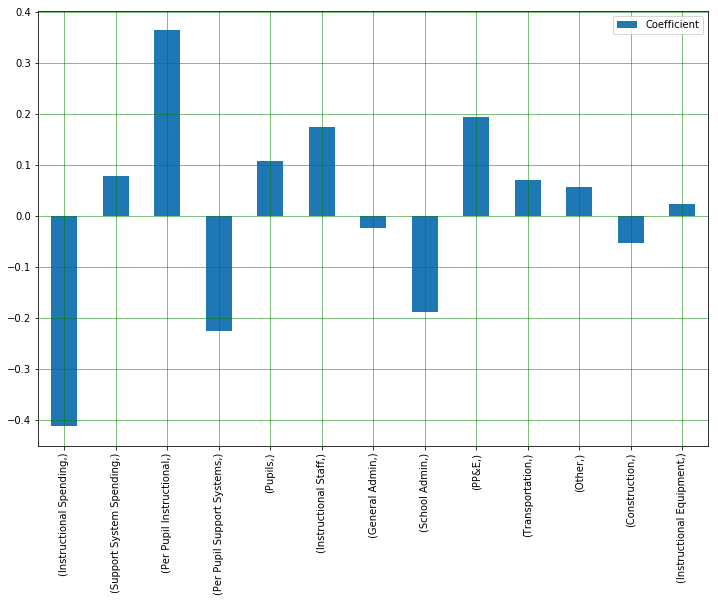

In [28]:
coeff_df.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
# df_copy[['Instructional Spending', 'Per Pupil Instructional']].plot(fontsize=20,figsize=(20,10))
# plt.xlabel("Instructional Spending and Per Pupil Instructional from 2009-2017 for all states")

In [20]:
# df.plot.scatter(x='Overall Score Avg', y='Geographic Area')
# df.groupby('Geographic Area').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=False)
g_df = df.groupby(['Geographic Area']).mean()
g_df.head()

,Instructional Spending,Support System Spending,Per Pupil Instructional,Per Pupil Support Systems,Pupils,Instructional Staff,General Admin,School Admin,PP&E,Transportation,Other,Construction,Instructional Equipment,Overall Score Avg
Geographic Area,,,,,,,,,,,,,,
Alabama,0.085475,0.086435,0.321902,0.392244,0.087895,0.065885,0.143337,0.083917,0.088113,0.096465,0.036247,0.066496,0.042412,0.915880
Alaska,0.028445,0.034865,0.606938,0.895498,0.041492,0.035867,0.028288,0.028775,0.039392,0.020412,0.021390,0.019091,0.032282,0.926661
Arizona,0.088725,0.105135,0.259641,0.373257,0.144121,0.070429,0.084893,0.067732,0.120222,0.097067,0.076311,0.068906,0.242313,0.930213
Arkansas,0.056867,0.061218,0.333246,0.432542,0.051798,0.083467,0.088933,0.046948,0.062275,0.049824,0.031135,0.040082,0.103464,0.930291
California,0.831779,0.824226,0.375808,0.448422,0.756754,0.820975,0.523767,0.833396,0.857586,0.440838,0.805616,0.766095,0.193955,0.918514


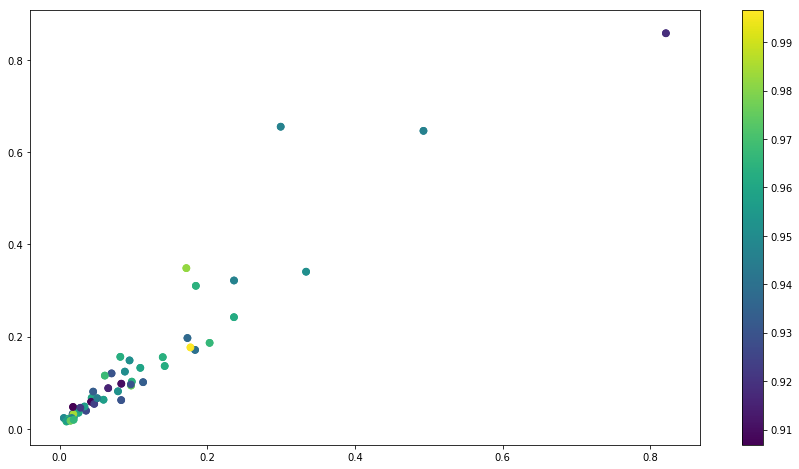

In [30]:
plt.figure(figsize=(15,8))
cm = plt.cm.get_cmap()
sc = plt.scatter(g_df['Instructional Staff'], g_df['PP&E']
, s=45, c=g_df['Overall Score Avg'], cmap=cm)
plt.colorbar(sc)
plt.scatter(g_df['Instructional Staff'], g_df['PP&E']
, s=45, c=g_df['Overall Score Avg'])

Visualizing the Multiple Regressions highest positive performing coefficients (Instructional Staff and PP&E). It is evident that there is no strong relation between higher spending in both areas and test score performance. Interestingly there is a linear relationship between both coefficients.

In [ ]:
plt.figure(figsize=(15,8))
cm = plt.cm.get_cmap()
sc = plt.scatter(g_df['Per Pupil Support Systems'], g_df['Instructional Spending']
, s=45, c=g_df['Overall Score Avg'], cmap=cm)
plt.colorbar(sc)
plt.scatter(g_df['Per Pupil Support Systems'], g_df['Instructional Spending']
, s=45, c=g_df['Overall Score Avg'])

Visualizing the relationship between the two most negative coefficients, further confirming that more analysis is required

In [ ]:
ax = g_df.plot(kind='scatter', x = g_df['Per Pupil Support Systems'], y = g_df['Instructional Spending'], color='DarkBlue', label='Group 1')

# df.plot(kind='scatter', x = g_df['Per Pupil Support Systems'], y = g_df['Instructional Spending'], color='DarkGreen', label='Group 2', ax=ax);

linear regression train score: 0.47010157198755487
linear regression test score: 0.08283621618535508
ridge regression train score low alpha: 0.4603606802006541
ridge regression test score low alpha: 0.1127259389571651
ridge regression train score high alpha: 0.022491486200908573
ridge regression test score high alpha: 0.017704938302818718


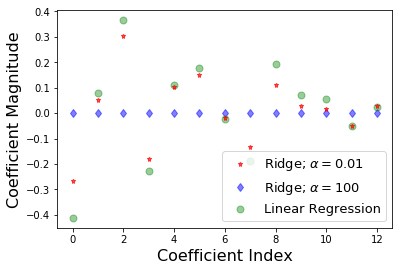

In [42]:
from sklearn.datasets import load_boston
# from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

training score: 0.0
test score:  -0.0033612918880416842
number of features used:  0
training score for alpha=0.01: 0.0
test score for alpha =0.01:  -0.0033612918880416842
number of features used: for alpha =0.01: 0
training score for alpha=0.0001: 0.26065183878402187
test score for alpha =0.0001:  0.11549095389155561
number of features used: for alpha =0.0001: 7
LR training score: 0.47010157198755487
LR test score:  0.08283621618535508


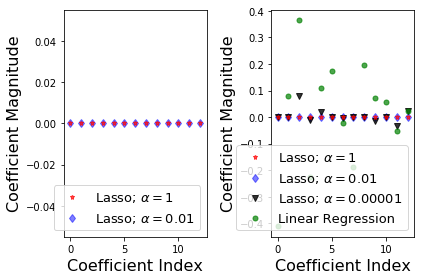

In [53]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
# from sklearn.cross_validation import train_test_split

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()
